In [10]:
# Импорт необходимых библиотек
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


## Шаг 1. Загрузка и предобработка данных

In [11]:
# Загрузка данных
data = pd.read_csv('data/Housing.csv')

# Удаление пропущенных значений
data = data.dropna()

# Преобразование целевого признака: классификация по медиане цены
median_price = data['price'].median()
data['target'] = (data['price'] > median_price).astype(int)

print("Shillo S.O. IKBO-25-21")

Shillo S.O. IKBO-25-21


## Шаг 2. Анализ баланса классов

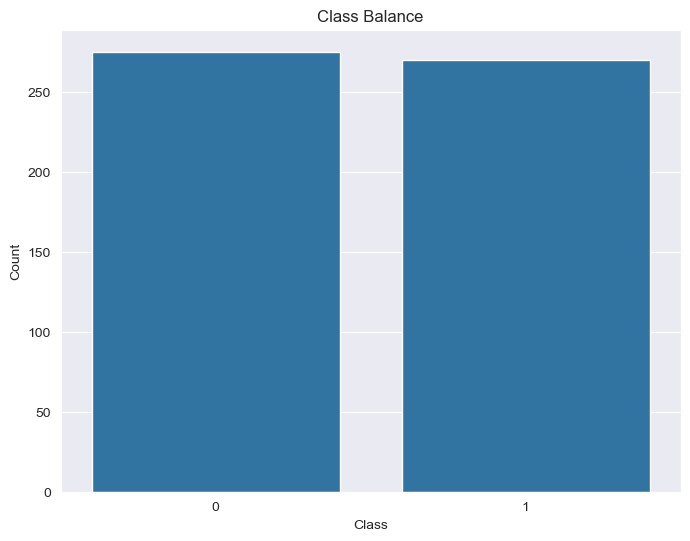

Shillo S.O. IKBO-25-21


In [12]:
# Построение гистограммы для оценки баланса классов
plt.figure(figsize=(8, 6))
sns.countplot(x=data['target'])
plt.title("Class Balance")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

print("Shillo S.O. IKBO-25-21")


## Шаг 3. Подготовка данных для обучения

In [13]:
# Преобразование категориальных переменных в численные с использованием One-Hot Encoding
data_encoded = pd.get_dummies(data.drop(columns=['price']), drop_first=True)
X = data_encoded  # теперь X не содержит категориальных переменных
y = data['target']

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shillo S.O. IKBO-25-21")


Shillo S.O. IKBO-25-21


## Шаг 4. Обучение моделей и оценка результатов

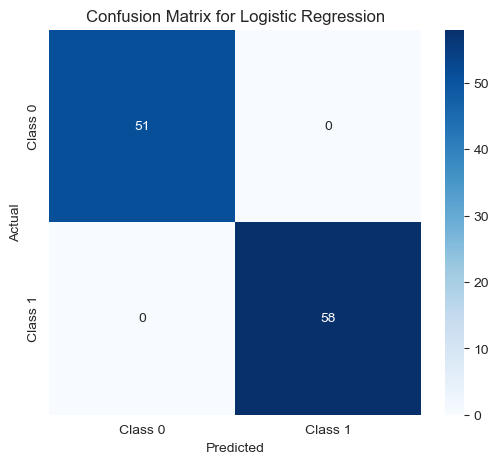

Shillo S.O. IKBO-25-21


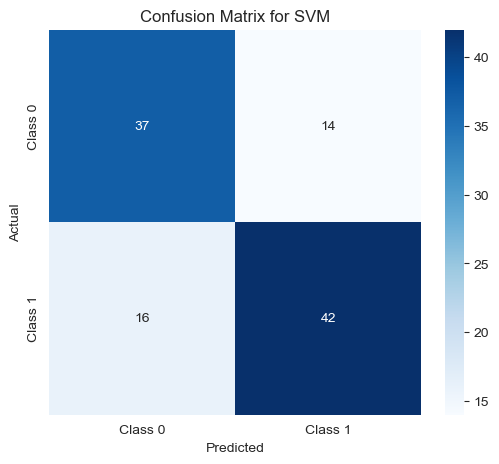

Shillo S.O. IKBO-25-21


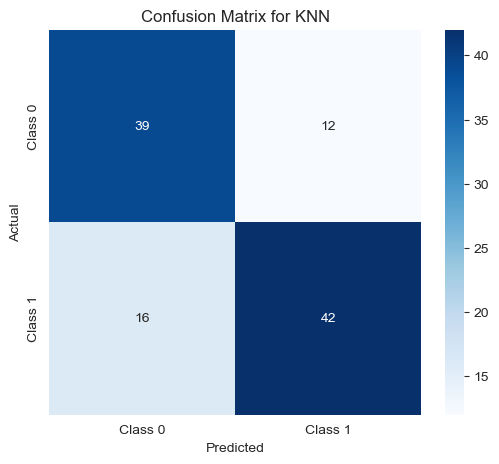

Shillo S.O. IKBO-25-21


In [14]:
# Определение моделей классификации
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier(n_neighbors=5)
}

# Сохранение результатов
results = {}

for model_name, model in models.items():
    # Обучение модели
    model.fit(X_train, y_train)
    # Предсказания на тестовых данных
    y_pred = model.predict(X_test)
    # Матрица ошибок
    cm = confusion_matrix(y_test, y_pred)
    # Метрики качества
    report = classification_report(y_test, y_pred, output_dict=True)
    
    # Сохранение результатов
    results[model_name] = {
        "confusion_matrix": cm,
        "classification_report": report
    }
    
    # Вывод матрицы ошибок
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
    plt.title(f"Confusion Matrix for {model_name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()
    
    print("Shillo S.O. IKBO-25-21")


## Шаг 5. Сравнение результатов моделей

In [15]:
# Сравнение метрик качества для каждой модели
for model_name, result in results.items():
    print(f"\nClassification Report for {model_name}:\n")
    print(pd.DataFrame(result["classification_report"]).transpose())
    
print("Shillo S.O. IKBO-25-21")



Classification Report for Logistic Regression:

              precision  recall  f1-score  support
0                   1.0     1.0       1.0     51.0
1                   1.0     1.0       1.0     58.0
accuracy            1.0     1.0       1.0      1.0
macro avg           1.0     1.0       1.0    109.0
weighted avg        1.0     1.0       1.0    109.0

Classification Report for SVM:

              precision    recall  f1-score     support
0              0.698113  0.725490  0.711538   51.000000
1              0.750000  0.724138  0.736842   58.000000
accuracy       0.724771  0.724771  0.724771    0.724771
macro avg      0.724057  0.724814  0.724190  109.000000
weighted avg   0.725723  0.724771  0.725003  109.000000

Classification Report for KNN:

              precision    recall  f1-score     support
0              0.709091  0.764706  0.735849   51.000000
1              0.777778  0.724138  0.750000   58.000000
accuracy       0.743119  0.743119  0.743119    0.743119
macro avg      0.74